In [31]:
import scipy
import IPython.display as ipd
import matplotlib.pyplot as plt
import os
import tqdm

from scipy.fft import fft, fftfreq
import numpy as np

# 1. DATA EXPLORATION

We explore the available dataset by loading samples, visualizing them and then performing a quick statistical analysis of the dataset such as the signal to noise ratio distribution, the difference in spectrograms of the noise and the voice and the Fourier transform of the different signals. 

### 1.1. Data visualisation

In [7]:
train_path = "Audio/source_separation/train/"
sample_number = "3125"
rate, signal_mix = scipy.io.wavfile.read(train_path + sample_number + "/mix_snr_-4.wav") 
_ , noise = scipy.io.wavfile.read(train_path + sample_number + "/noise.wav")
_, voice = scipy.io.wavfile.read(train_path + sample_number + "/voice.wav") 
print("The sampling rate is", rate)
ipd.Audio(signal_mix, rate=rate)


the sampling rate is 8000


In [8]:
ipd.Audio(noise, rate=rate)


In [26]:
ipd.Audio(voice, rate=rate)


SIGNALS:

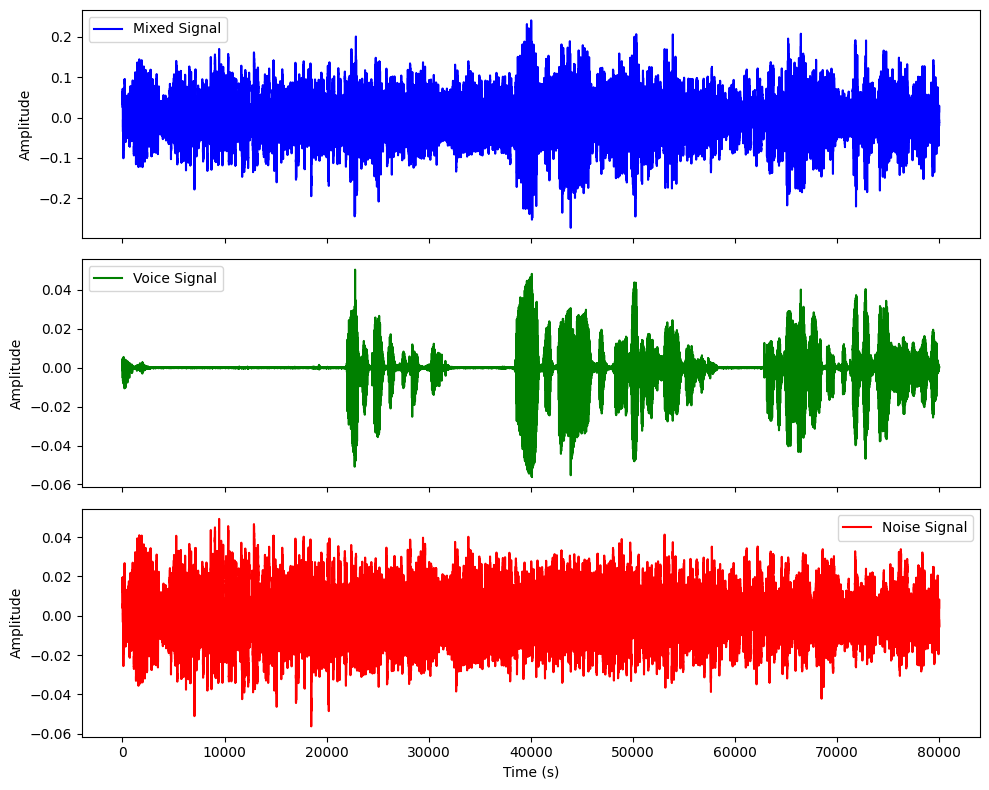

In [27]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot the mixed signal
axs[0].plot(signal_mix, label='Mixed Signal', color='blue')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# Plot the voice signal
axs[1].plot(voice, label='Voice Signal', color='green')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

# Plot the noise signal
axs[2].plot(noise, label='Noise Signal', color='red')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

plt.tight_layout()
plt.show()


FOURIER TRANSFORMS:

In [ ]:
# Number of sample points
N = len(signal_mix)
# sample spacing
T = 1.0 / rate

fourier_mix = fft(signal_mix)
fourier_freq = fftfreq(N, T)[:N//2]
fourier_voice = fft(voice)
fourier_noise = fft(noise)


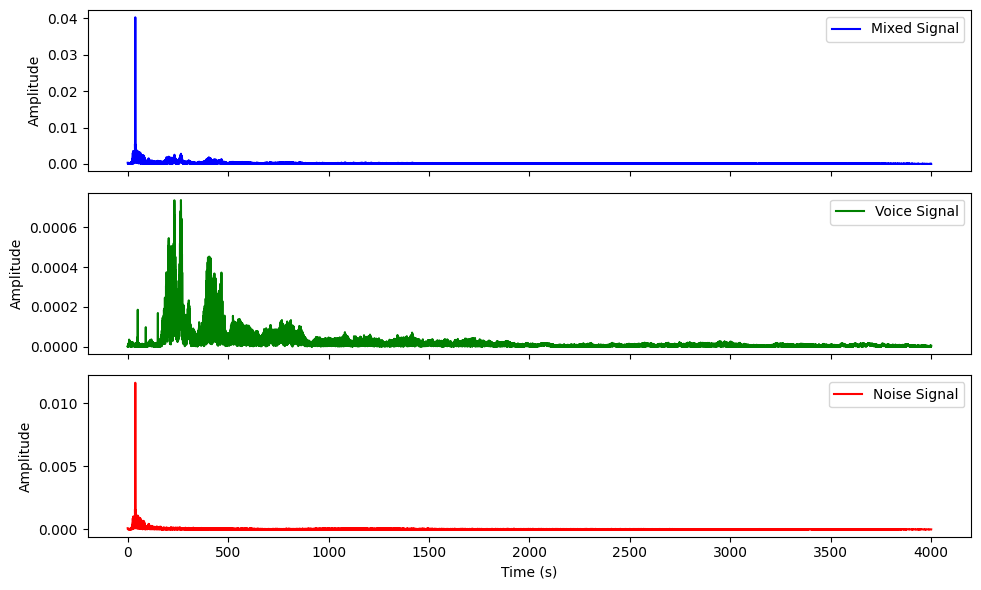

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Plot the mixed signal Fourier transform
axs[0].plot(fourier_freq, 2.0/N * np.abs(fourier_mix[0:N//2]), label='Mixed Signal', color='blue')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# Plot the voice signal Fourier transform
axs[1].plot(fourier_freq, 2.0/N * np.abs(fourier_voice[0:N//2]), label='Voice Signal', color='green')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

# Plot the noise signal Fourier transform
axs[2].plot(fourier_freq, 2.0/N * np.abs(fourier_noise[0:N//2]), label='Noise Signal', color='red')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

plt.tight_layout()
plt.show()


SPECTROGRAMS:

In [28]:
from scipy.signal import stft
import matplotlib.colors as colors

fe = rate  # Fréquence d'échantillonnage
window_size_ms = 25  # Taille de la fenêtre en millisecondes (20-40 ms pour la voix humaine)
nperseg = int(fe * window_size_ms / 1000)  # Calcul du nombre d'échantillons par fenêtre
nfft = nperseg  # Taille de la FFT 


freq_mix, time_mix, spectrogram_mix = stft(signal_mix, fs=fe, nperseg=nperseg, nfft=nfft)
freq_voice, time_voice, spectrogram_voice = stft(voice, fs=fe, nperseg=nperseg, nfft=nfft)
freq_noise, time_noise, spectrogram_noise = stft(noise, fs=fe, nperseg=nperseg, nfft=nfft)

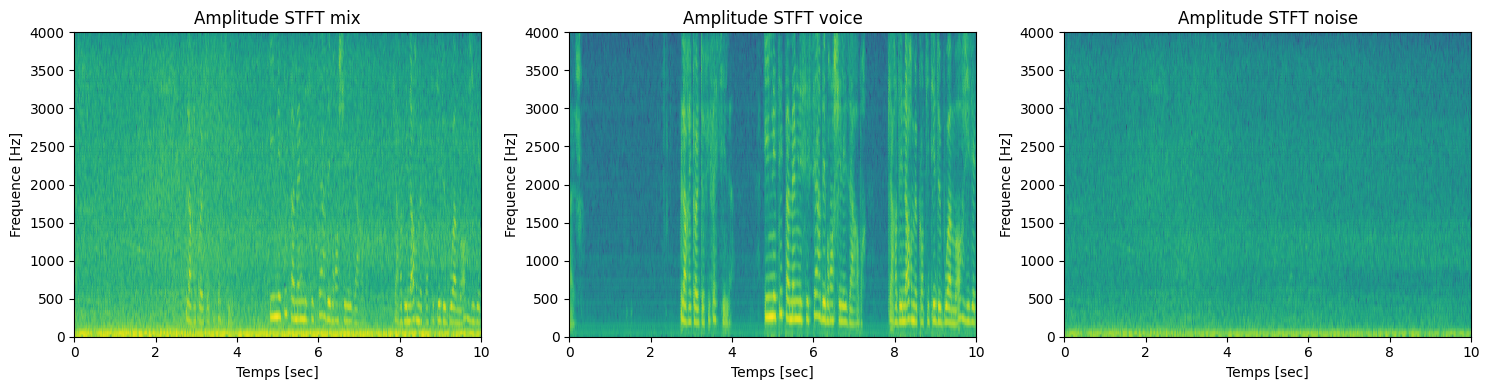

In [29]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot the mixed signal
axs[0].pcolormesh(time_mix, freq_mix, np.abs(spectrogram_mix), 
               norm=colors.LogNorm(vmin=np.abs(spectrogram_mix).min(), vmax=np.abs(spectrogram_mix).max()), 
               shading='gouraud')
axs[0].set_ylabel('Frequence [Hz]')
axs[0].set_xlabel('Temps [sec]')
axs[0].set_title('Amplitude STFT mix')

# Plot the voice signal
axs[1].pcolormesh(time_voice, freq_voice, np.abs(spectrogram_voice), 
               norm=colors.LogNorm(vmin=np.abs(spectrogram_voice).min(), vmax=np.abs(spectrogram_voice).max()), 
               shading='gouraud')
axs[1].set_ylabel('Frequence [Hz]')
axs[1].set_xlabel('Temps [sec]')
axs[1].set_title('Amplitude STFT voice')

# Plot the noise signal
axs[2].pcolormesh(time_noise, freq_noise, np.abs(spectrogram_noise), 
               norm=colors.LogNorm(vmin=np.abs(spectrogram_mix).min(), vmax=np.abs(spectrogram_mix).max()), 
               shading='gouraud')
axs[2].set_ylabel('Frequence [Hz]')
axs[2].set_xlabel('Temps [sec]')
axs[2].set_title('Amplitude STFT noise')

# Adjust layout
plt.tight_layout()
plt.show()


### 2.2 Statistical analysis

DISTRIBUTION OF THE SNR:

In [147]:
train_small_path = "Audio/source_separation/train_small/"

N_samples = len(signal_mix)
N_train = len(os.listdir(train_small_path))

mix_signals = np.zeros((N_train, N_samples))
voices = np.zeros((N_train, N_samples))
noises = np.zeros((N_train, N_samples))
fourier_voices = np.zeros((N_train, N_samples))
fourier_noises = np.zeros((N_train, N_samples))

for (i, f) in enumerate(os.listdir(train_small_path)):
    if '.' not in f:
        files_list = os.listdir(train_small_path + '/' + f)
    
        voice_path = train_small_path + '/' + f + '/' + files_list[0]
        mix_path = train_small_path + '/' + f + '/' + files_list[1]
        noise_path = train_small_path + '/' + f + '/' + files_list[2]

        _, signal_mix = scipy.io.wavfile.read(mix_path) 
        _ , noise = scipy.io.wavfile.read(noise_path)
        _, voice = scipy.io.wavfile.read(voice_path) 

        mix_signals[i, :] = signal_mix
        voices[i, :] = voice
        noises[i, :] = noise

        fourier_voices[i, :] = fft(voice)
        fourier_noises[i, :] = fft(noise)
        fourier_freq = fftfreq(N_samples, T)[:N_samples//4]


/var/folders/t8/ssf_3b9x74ldhyhx0tc_79000000gn/T/ipykernel_18414/4206806538.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  fourier_voices[i, :] = fft(voice)
/var/folders/t8/ssf_3b9x74ldhyhx0tc_79000000gn/T/ipykernel_18414/4206806538.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  fourier_noises[i, :] = fft(noise)


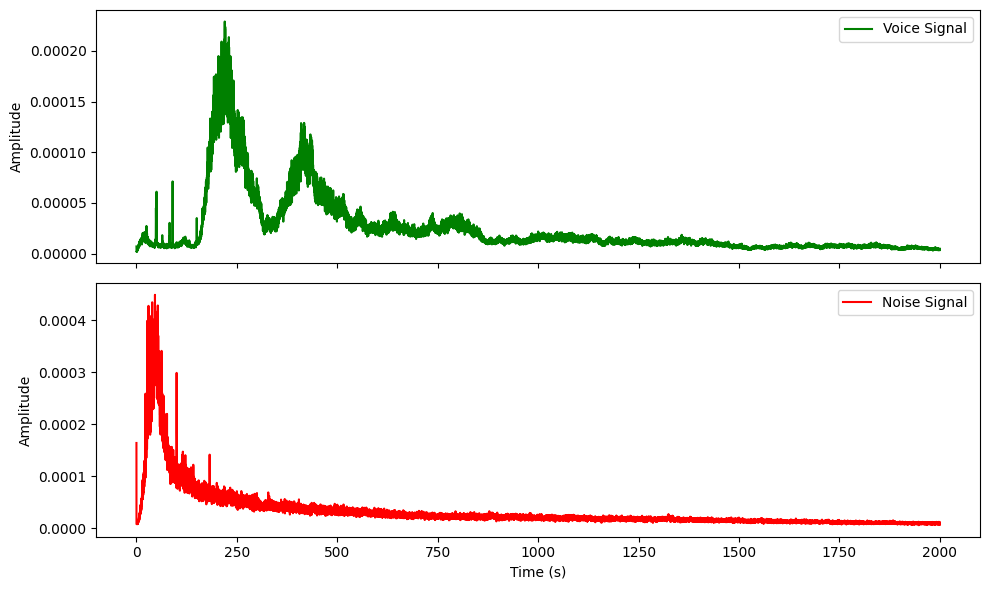

In [148]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot the voice signal Fourier transform
axs[0].plot(fourier_freq, np.mean(2.0/N * np.abs(fourier_voices[:, 0:N//4]), axis=0), label='Voice Signal', color='green')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

# Plot the noise signal Fourier transform
axs[1].plot(fourier_freq, np.mean(2.0/N * np.abs(fourier_noises[:, 0:N//4]), axis=0), label='Noise Signal', color='red')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

plt.tight_layout()
plt.show()

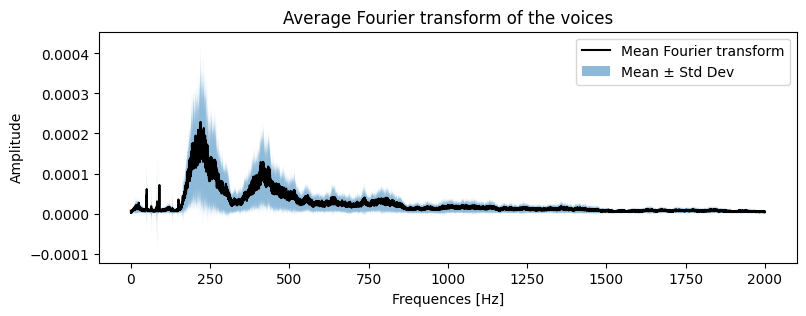

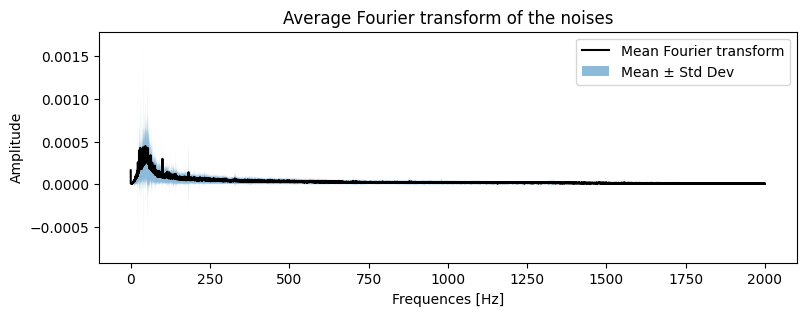

In [149]:
# Plot the average and standard deviation
fig, ax = plt.subplots(figsize=(9, 3))
avg_v = (2.0/N * np.abs(fourier_voices[:, 0:N//4])).mean(axis=0)
std_v = (2.0/N * np.abs(fourier_voices[:, 0:N//4])).std(axis=0)

ax.plot(fourier_freq, avg_v, 'k-', label="Mean Fourier transform")
ax.fill_between(fourier_freq, avg_v - std_v, avg_v + std_v, alpha=0.5, label="Mean ± Std Dev")
ax.set_xlabel("Frequences [Hz]")
ax.set_ylabel("Amplitude")
ax.legend()
plt.title("Average Fourier transform of the voices")
plt.show()

# Plot the average and standard deviation
fig, ax = plt.subplots(figsize=(9, 3))
avg = (2.0/N * np.abs(fourier_noises[:, 0:N//4])).mean(axis=0)
std = (2.0/N * np.abs(fourier_noises[:, 0:N//4])).std(axis=0)

ax.plot(fourier_freq, avg, 'k-', label="Mean Fourier transform")
ax.fill_between(fourier_freq, avg - std, avg + std, alpha=0.5, label="Mean ± Std Dev")
ax.set_xlabel("Frequences [Hz]")
ax.set_ylabel("Amplitude")
ax.legend()
plt.title("Average Fourier transform of the noises")
plt.show()

SIGNAL-TO-NOISE RATIO:

In [150]:
def compute_snr(signal, noise):
    power_signal = np.sum(signal ** 2)
    power_noise = np.sum(noise ** 2)
    snr = 10 * np.log10(power_signal / power_noise)
    return snr

snr_list = []

for i in range(N_train):
    snr_list.append(compute_snr(voices[i, :], noises[i, :]))

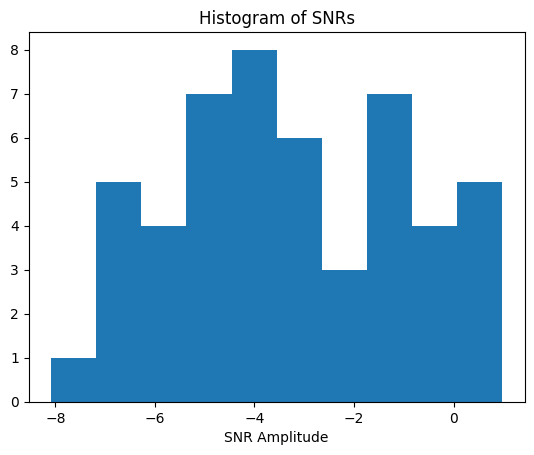

In [151]:
plt.hist(snr_list, bins=10)
plt.xlabel("SNR Amplitude")
plt.title("Histogram of SNRs")
plt.show()

We can see from the dataset studies that we have a noise that is mainly concentrated on the higher frequences and the voices is mostly concentrated on frequencies that are below 200Hz. We can also see that the SNR ratio evolve between 1 and -8. 

# 2. LEARNING MODELS

### 2.1 SIMPLE FREQUENCY FILTERING (BASELINE)

The first method that we implemented was a simple frequency filter cutting off 200Hz as the studies on the small train sets shows that most of the frequencies of the voice are below. 

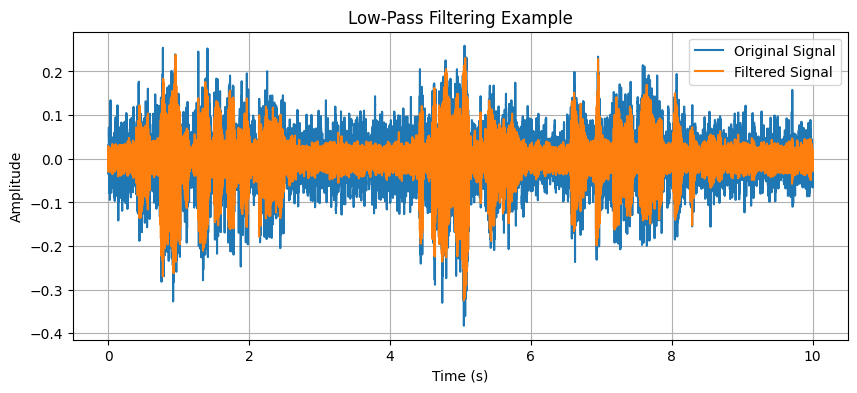

In [153]:
#High pass filter
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Filter parameters
cutoff_freq_up = 450  # Cutoff frequency in Hz
cutoff_freq_down = 150  # Cutoff frequency in Hz
order = 3  # Filter order

# Design the low-pass filter
nyq = 0.5 * rate
normal_cutoff_up = cutoff_freq_up / nyq
normal_cutoff_down = cutoff_freq_down / nyq
b, a = butter(order, normal_cutoff_down, btype='highpass')

# Sample data (with time vector)
T = 1.0 / rate
t = np.linspace(0.0, N_samples*T, N_samples)  


#application on a signal sample

test_path = "Audio/source_separation/train/"
sample_number = "0000"
rate, signal_mix = scipy.io.wavfile.read(test_path + sample_number + "/mix_snr_-1.wav") 
_ , noise = scipy.io.wavfile.read(train_path + sample_number + "/noise.wav")
_, voice = scipy.io.wavfile.read(train_path + sample_number + "/voice.wav") 

filtered_data = filtfilt(b, a, signal_mix)

# Plot the original and filtered data
plt.figure(figsize=(10, 4))

plt.plot(t, signal_mix, label='Original Signal')
plt.plot(t, filtered_data, label='Filtered Signal')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Low-Pass Filtering Example')
plt.legend()
plt.grid(True)

plt.show()


In [145]:
ipd.Audio(filtered_data, rate=rate)

CHOICE OF THE BEST PARAMETERS FOR THE FILTER ON THE TRAIN SET:

We can see that the results are quite poor but will serve as a baseline to compare the follwoing algorithms. 

### 2.2. SECOND METHOD USING SPECTROGRAM MASKING

The first method we tried and implemented was a very simple unet used to learn the mask on the spectrograms. The objective is to learn the masks to apply to the spectrogram to be able to separate the voice and the noise based on the process seen in class.  

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchaudio
from torchaudio.transforms import Spectrogram, InverseSpectrogram

# Simple UNet model
class UNet(nn.Module):
    def __init__(self, n_sources):
        super(UNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, n_sources, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Dataset and preprocessing
class SourceSeparationDataset(torch.utils.data.Dataset):
    def __init__(self, mixture_paths, source_paths, n_fft=2048, hop_length=512):
        self.mixture_paths = mixture_paths
        self.source_paths = source_paths
        self.spectrogram = Spectrogram(n_fft=n_fft, hop_length=hop_length, power=1)
    
    def __len__(self):
        return len(self.mixture_paths)
    
    def __getitem__(self, idx):
        _, mixture = torchaudio.load(self.mixture_paths[idx])
        _, source = torchaudio.load(self.source_paths[idx])
        mixture_spec = self.spectrogram(mixture)
        source_spec = self.spectrogram(source)
        return mixture_spec, source_spec

# Training loop
def train(model, dataset, n_epochs=10, batch_size=16, lr=0.001):
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    
    for epoch in tqdm(range(n_epochs)):
        total_loss = 0
        print(next(iter(dataloader)))
        for mixture_spec, source_spec in dataloader:
            mixture_spec = mixture_spec.unsqueeze(1)  # Add channel dimension
            source_spec = source_spec.unsqueeze(1)
            
            optimizer.zero_grad()
            masks = model(mixture_spec)  # Predict masks
            estimated_spec = masks * mixture_spec
            loss = criterion(estimated_spec, source_spec)  # Compute loss
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {total_loss/len(dataloader)}")





In [53]:
dataset = "dataset/file_paths_train.txt"
dataset_list = [line.rstrip('\n') for line in open(os.path.abspath(os.path.expanduser(dataset)), "r")]

mixture_paths = []
voice_paths = []

for item in range(len(dataset_list)):
    mixture_path, voice_path = dataset_list[item].split(" ")
    mixture_paths.append(mixture_path)
    voice_paths.append(voice_path)
    

dataset = SourceSeparationDataset(mixture_paths, voice_paths)

model = UNet(n_sources=1)
train(model, dataset)

RuntimeError: Couldn't find appropriate backend to handle uri Audio/source_separation/train/4241/mix_snr_-4.wav and format None.

### 2.3 Wave-U LEARNING

The second method that we tested was the Wave-U-Net from D. Stoller  et Al., WAVE-U-NET: A MULTI-SCALE NEURAL NETWORK FOR END-TO-END AUDIO SOURCE SEPARATION, ISMIR 2018 as it is presented as the state of the art in the literature in terms of source separation. We used the implementation proposed by https://github.com/haoxiangsnr/Wave-U-Net-for-Speech-Enhancement/ and adapted it to the task of source separation to obtained conjointly the voice and the noice as an output. 

# 3. EVALUATION METRICS

With the previously trained models, we completed the inference on the test dataset to evaluate the performance of our methods. The metrics that we used are the PESQ and the STOI metrics computed with already existing python libraries. 


In [106]:
from pesq import pesq
from pystoi.stoi import stoi
# Compute the metrics

def compute_STOI(clean_signal, noisy_signal, sr=rate):
    return stoi(clean_signal, noisy_signal, sr, extended=False)

def compute_PESQ(clean_signal, noisy_signal, sr=rate):
    return pesq(sr, clean_signal, noisy_signal, "wb")

### 3.1. Evaluation of the filter results

In [ ]:
# application of the filter on the test set


METRICS RESULTS:

In [ ]:
# Display  results

QUALITATIVE RESULTS:

In [ ]:
# show the voice and noise separation results

### 3.2. Evaluation of the spectrograms masking

### 3.3 Evaluation of the Wave-U-Net

# Add Conclusion